# Neural Network Regression with TensorFlow - Exercises

### 1. Create your own regression dataset and build a model for it. You can base you dataset on one used in the main notebook.

In [133]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<AxesSubplot: >

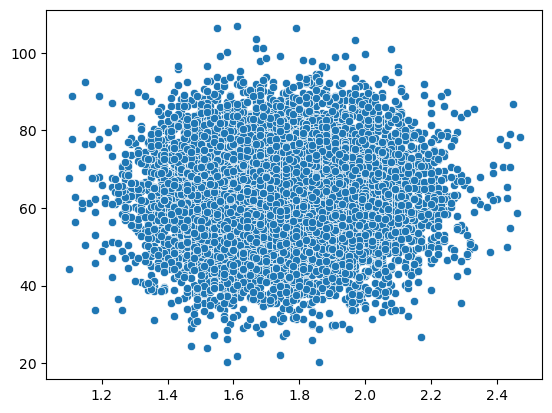

In [134]:
# Create a dataset
X = np.round(np.random.normal(loc=1.75, # centre of distribution
                              scale=0.2, # standard deviation
                              size=10000), 2)
y = np.round(np.random.normal(loc=63,
                              scale=12,
                              size=10000), 2)

# Plot the data
sns.scatterplot(x=X, y=y)

In [135]:
# Convert to columns
Xy_stacked = np.column_stack((X,y))

# Convert to DataFrame
df = pd.DataFrame(data=Xy_stacked,
                  columns=['X', 'y'])

df['value'] = df['y'] / (df['X']**2)
df.head()

,X,y,value
0,1.71,66.67,22.800178
1,1.41,59.96,30.159449
2,1.63,53.91,20.290564
3,1.65,63.58,23.353535
4,1.69,66.67,23.343020


Text(0.5, 1.0, 'BMI')

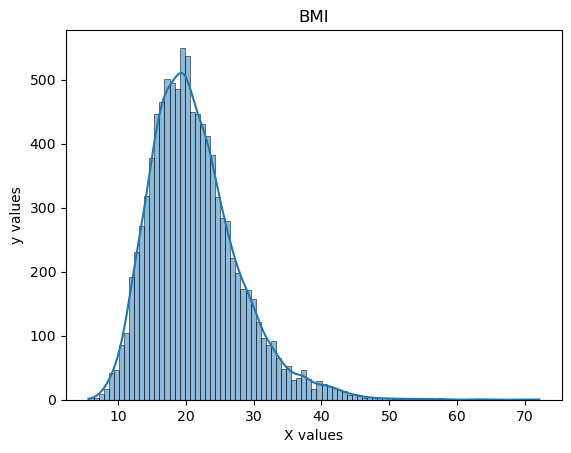

In [136]:
# Plot the distribution
sns.histplot(df['value'], kde=True)
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('BMI')

In [137]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split

# Create feature and values set
X_data = df.drop('value', axis=1)
y_data = df['value']

# Check the shapes
X_data.shape, y_data.shape

# Split the data for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42, test_size=0.2)

# Check the shapes again
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((2000, 2), (8000, 2), (2000,), (8000,))

In [138]:
# How does the input look like?
X_test.iloc[0]

X     1.73
y    75.74
Name: 6252, dtype: float64

In [139]:
# Create a model and fit it to the data
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float32'),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1)
], name='base_model_1')

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1_history = model_1.fit(X_train,
                              y_train,
                              epochs=50,
                              validation_data=(X_test, y_test),
                              verbose=0)

print("Training finished :)")

2023-06-13 23:00:52.757726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-13 23:00:54.038235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Training finished :)


In [140]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

# Make predictions
model_1_preds = model_1.predict(X_test)
model_1_preds[:10]

63/63 [==============================] - 0s 2ms/step


2023-06-13 23:01:33.310944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[23.95435 ],
       [26.250574],
       [21.473957],
       [24.52961 ],
       [19.14148 ],
       [24.956787],
       [17.047216],
       [26.641365],
       [22.784786],
       [17.139294]], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


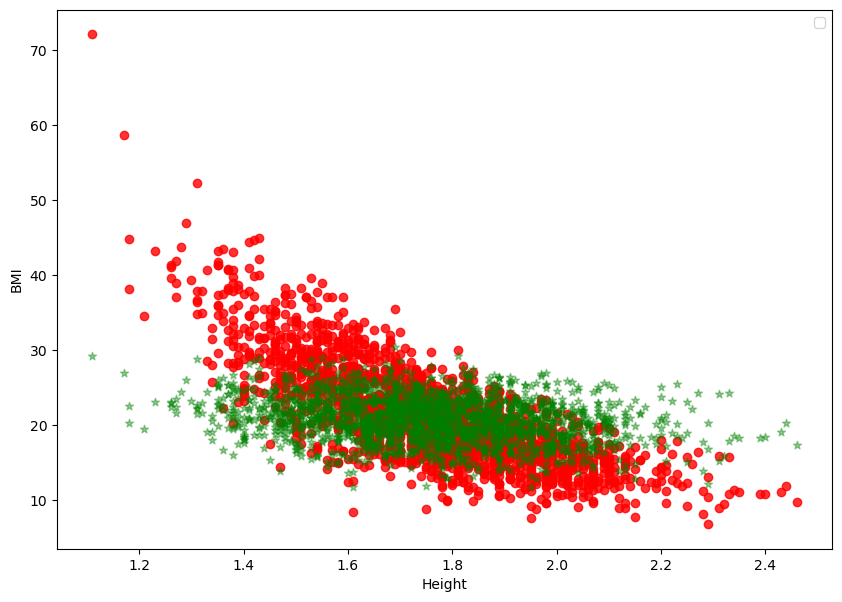

In [141]:
# Plot the results
plt.figure(figsize=(10,7))
plt.scatter(x=X_test['X'], y=y_test, c='red', alpha=0.8)
plt.scatter(x=X_test['X'], y=model_1_preds, c='green', alpha=0.4, marker='*')
plt.xlabel('Height')
plt.ylabel('BMI')
plt.legend()

### 2. Try building your own regression neural network with 4 Dense layers and fitting it on the regression dataset you've created in step 1. How does it perform?

In [142]:
# Create a model
from tensorflow.keras.layers import Dense

# Set random seed
#tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float32'),
    Dense(32, 'relu'),
    Dense(32, 'relu'),
    Dense(32, 'relu'),
    Dense(32, 'relu'),
    Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2_history = model_2.fit(X_train,
                              y_train,
                              epochs=50, 
                              validation_data=(X_test, y_test),
                              verbose=0)

print('Training finished :)')

2023-06-13 23:01:33.801274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-13 23:01:34.781179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Training finished :)


In [143]:
# Evaluate the model
model_2.evaluate(X_test, y_test)

# Make preds
model_2_preds = model_2.predict(X_test)
model_2_preds[:10]

63/63 [==============================] - 0s 2ms/step


2023-06-13 23:02:23.424745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[19.927284],
       [19.927284],
       [19.927284],
       [19.927284],
       [19.927284],
       [19.927284],
       [19.927284],
       [19.927284],
       [19.927284],
       [19.927284]], dtype=float32)

Text(0, 0.5, 'BMI')

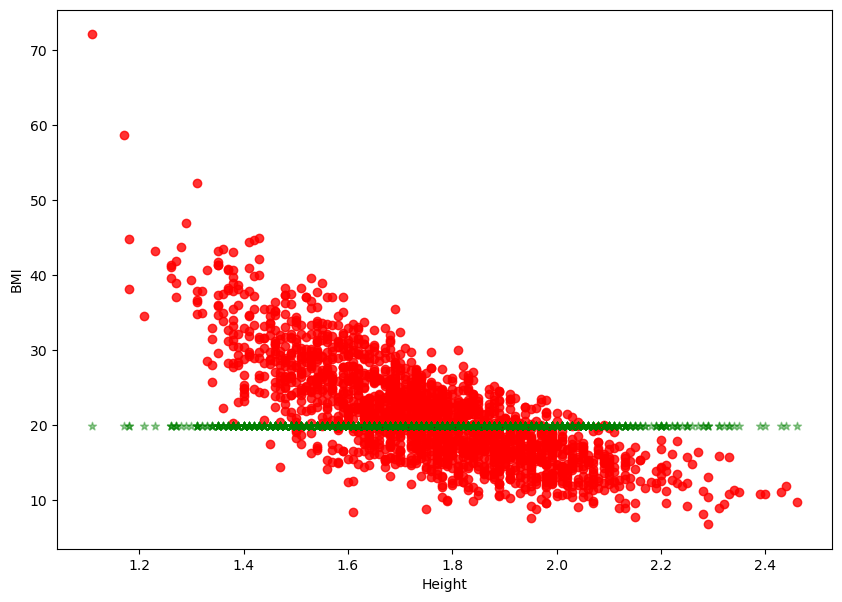

In [144]:
# Plot the results
plt.figure(figsize=(10,7))
plt.scatter(x=X_test['X'], y=y_test, c='red', alpha=0.8)
plt.scatter(x=X_test['X'], y=model_2_preds, c='green', alpha=0.4, marker='*')
plt.xlabel('Height')
plt.ylabel('BMI')

Seems like the model in underfitting on the 4-layer architecture with Dense layers only. This may be due to one of the following:
* too complex architecture for the given problem
* too little data
* wrong architecture
* too little features

### 3. Try and improve the results obtained in main notebook with insurance dataset. Some things you may want to include:
* build a larger model 
* increase the number of units in each layer
* lookup the documentation for `Adam()` optimizer and find out the first parameter, then increase it 10 times
* what happens if you train it for longer?

In [145]:
# Get the data
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [146]:
# One-hot encode the features
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [147]:
# Create X and y sets
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

**NOTE**

Results to beat are (as per `model_3` in main notebook): 
* loss / MAE = 3168.5

In [148]:
# Set random seed
tf.random.set_seed(42)

# Create a model (4 layers, as suggested above)
model_3 = tf.keras.models.Sequential([
    Dense(64),
    Dense(64), 
    Dense(32),
    Dense(32),
    Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
model_3_history = model_3.fit(X_train,
                              y_train, 
                              epochs=300,
                              verbose=1)

Epoch 1/300
 9/34 [======>.......................] - ETA: 0s - loss: 13266.1289 - mae: 13266.1289 

2023-06-13 23:02:24.799161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 8ms/step - loss: 12971.5498 - mae: 12971.5498
Epoch 2/300
34/34 [==============================] - 0s 6ms/step - loss: 9137.5674 - mae: 9137.5674
Epoch 3/300
34/34 [==============================] - 0s 5ms/step - loss: 7452.8574 - mae: 7452.8574
Epoch 4/300
34/34 [==============================] - 0s 5ms/step - loss: 7261.2246 - mae: 7261.2246
Epoch 5/300
34/34 [==============================] - 0s 5ms/step - loss: 7177.7764 - mae: 7177.7764
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 7075.8999 - mae: 7075.8999
Epoch 7/300
34/34 [==============================] - 0s 6ms/step - loss: 6964.1494 - mae: 6964.1494
Epoch 8/300
34/34 [==============================] - 0s 6ms/step - loss: 6824.5381 - mae: 6824.5381
Epoch 9/300
34/34 [==============================] - 0s 6ms/step - loss: 6698.6768 - mae: 6698.6768
Epoch 10/300
34/34 [==============================] - 0s 6ms/step - loss: 6632.8013 - mae: 6632.8013
Epoch 11/

In [149]:
# Evaluate the model
model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 7ms/step - loss: 3222.0647 - mae: 3222.0647


2023-06-13 23:03:46.905146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[3222.064697265625, 3222.064697265625]

<AxesSubplot: >

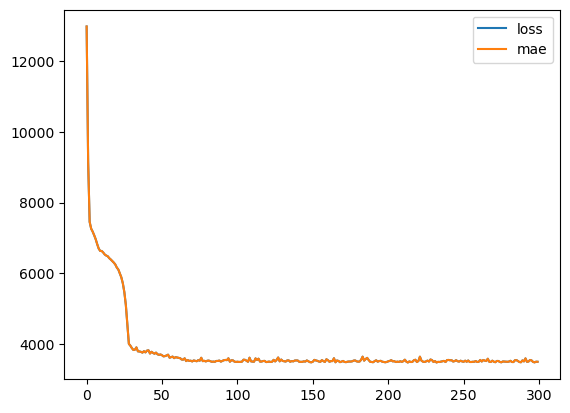

In [150]:
# Check the history
pd.DataFrame(model_3_history.history).plot()

Look like model did find the best performance very fast and the fluctuated somewhere close. Let's try another models then.

In [151]:
# Same as model_3, but with more hidden units (amounts doubled)

# Set random seed
tf.random.set_seed(42)

# Create a model (4 layers, as suggested above)
model_4 = tf.keras.models.Sequential([
    Dense(128),
    Dense(128), 
    Dense(64),
    Dense(64),
    Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
model_4_history = model_4.fit(X_train,
                              y_train, 
                              epochs=300,
                              verbose=1)

Epoch 1/300
 9/34 [======>.......................] - ETA: 0s - loss: 13207.5869 - mae: 13207.5869 

2023-06-13 23:03:47.408588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 7ms/step - loss: 11748.1416 - mae: 11748.1416
Epoch 2/300
34/34 [==============================] - 0s 6ms/step - loss: 7527.1099 - mae: 7527.1099
Epoch 3/300
34/34 [==============================] - 0s 5ms/step - loss: 7224.5391 - mae: 7224.5391
Epoch 4/300
34/34 [==============================] - 0s 5ms/step - loss: 7030.5098 - mae: 7030.5098
Epoch 5/300
34/34 [==============================] - 0s 6ms/step - loss: 6847.0205 - mae: 6847.0205
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 6668.6030 - mae: 6668.6030
Epoch 7/300
34/34 [==============================] - 0s 5ms/step - loss: 6657.1099 - mae: 6657.1099
Epoch 8/300
34/34 [==============================] - 0s 6ms/step - loss: 6571.5430 - mae: 6571.5430
Epoch 9/300
34/34 [==============================] - 0s 5ms/step - loss: 6520.8022 - mae: 6520.8022
Epoch 10/300
34/34 [==============================] - 0s 5ms/step - loss: 6445.6025 - mae: 6445.6025
Epoch 11/

In [152]:
# Evaluate the model
model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3178.3318 - mae: 3178.3318


2023-06-13 23:04:44.527473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[3178.331787109375, 3178.331787109375]

Results for `model_4` are approx. 50 units lower than for `model_3`, however this still does not beat the baseline. Let's try another models and techniques.

Now we'll mess up a bit with learning rate, bit with a twist - we'll use `ReduceLROnPlateau` callback to reduce the learning rate if it'll be stalling for too long.

In [153]:
# Same as model_4, but with Reduce LROnPlateau callback
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    Dense(128),
    Dense(128), 
    Dense(64),
    Dense(64),
    Dense(1)
])

model_5.compile(loss='mae',
                optimizer='adam',
                metrics=['mae'])

model_5_history = model_5.fit(X_train,
                              y_train,
                              epochs=300,
                              verbose=1,
                              validation_data=(X_test, y_test),
                              callbacks=[ReduceLROnPlateau(monitor='val_loss',
                                                           factor=0.1,
                                                           mode='min',
                                                           patience=30,
                                                           cooldown=30,
                                                           verbose=1),
                                        EarlyStopping(monitor='val_loss',
                                                      patience=35,
                                                      restore_best_weights=True,
                                                      verbose=1)])

Epoch 1/300
 7/34 [=====>........................] - ETA: 0s - loss: 13272.0029 - mae: 13272.0029 

2023-06-13 23:04:44.968377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 14ms/step - loss: 11970.6602 - mae: 11970.6602 - val_loss: 7737.9429 - val_mae: 7737.9429 - lr: 0.0010
Epoch 2/300
10/34 [=======>......................] - ETA: 0s - loss: 7485.0264 - mae: 7485.0264

2023-06-13 23:04:45.459452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 8ms/step - loss: 7546.4224 - mae: 7546.4224 - val_loss: 7455.9980 - val_mae: 7455.9980 - lr: 0.0010
Epoch 3/300
34/34 [==============================] - 0s 7ms/step - loss: 7247.5972 - mae: 7247.5972 - val_loss: 7224.6787 - val_mae: 7224.6787 - lr: 0.0010
Epoch 4/300
34/34 [==============================] - 0s 7ms/step - loss: 7065.0063 - mae: 7065.0063 - val_loss: 6957.2183 - val_mae: 6957.2183 - lr: 0.0010
Epoch 5/300
34/34 [==============================] - 0s 7ms/step - loss: 6893.8433 - mae: 6893.8433 - val_loss: 6648.2280 - val_mae: 6648.2280 - lr: 0.0010
Epoch 6/300
34/34 [==============================] - 0s 7ms/step - loss: 6703.8179 - mae: 6703.8179 - val_loss: 6496.6431 - val_mae: 6496.6431 - lr: 0.0010
Epoch 7/300
34/34 [==============================] - 0s 7ms/step - loss: 6680.4155 - mae: 6680.4155 - val_loss: 6482.0742 - val_mae: 6482.0742 - lr: 0.0010
Epoch 8/300
34/34 [==============================] - 0s 7ms/step - loss: 660

In [154]:
# Evaluate the model
model_5.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3157.0283 - mae: 3157.0283


[3157.0283203125, 3157.0283203125]

<AxesSubplot: >

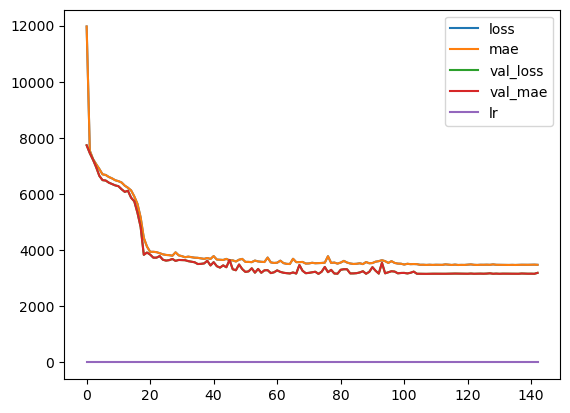

In [155]:
# Check the history plot
pd.DataFrame(model_5_history.history).plot()

We can call this a success - the baseline has been beaten with usage of some handy tricks with a margin of approx. 10 units. The results may become even better, however the goal of this exercise is not to produce a cutting-edge model for this problem. Onwards!

Addressing the last question from this task asking 'what will happen if you'll train the model for longer' - probably not much looking at the plots above. Usage of `EarlyStopping` callback has proven that for this dataset, not even 300 epochs is needed to get well performing model as it did stop halfway on epoch 143 due to not improving since epoch 108. This *could be* useful but in addition to other tweaks like:
* even deeper network
* more hidden units
* additional type of layers (MaxPooling, Dropouts)

It's something that can be looked into, but as mentioned before - not the vital part of these exercises.